In [2]:
#importing useful libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [6]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'id':'priceblock_ourprice'}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available

In [10]:
if __name__ == '__main__':

    # add your user agent 
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.in/s?k=play+station+5&crid=RG04BPUFVL2X&sprefix=play+station+%2Caps%2C239&ref=nb_sb_noss"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-line-clamp-2 s-link-style a-text-normal'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.in" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))

    
    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'] = amazon_df['title'].replace('', np.nan)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

In [12]:
amazon_df

,title,price,rating,reviews,availability
0,Sony PlayStation5 Gaming Console (Slim),,4.5 out of 5 stars,409 ratings,In stock
1,Sony PlayStation®5 Digital Edition (slim) Cons...,,4.6 out of 5 stars,387 ratings,In stock
2,Sony PS5® Console Video Game Digital - Fortnit...,,4.4 out of 5 stars,67 ratings,In stock
3,Rockstar Games PS5 Video Game ConsoleGrand The...,,4.5 out of 5 stars,"1,110 ratings",In stock
4,Sony PS5 Gaming Console Digital Standalone,,4.6 out of 5 stars,552 ratings,Only 1 left in stock.
5,Playstation |Flat 2% Cashback | E-Gift Card | ...,,4.7 out of 5 stars,883 ratings,In stock
6,Ant Esports Dock5 RGB with Cooling Fan and Dua...,,4.3 out of 5 stars,364 ratings,In stock
7,Electronic Arts EA Sports FC 25 | Standard Edi...,,4.2 out of 5 stars,93 ratings,In stock
8,Cranique Waterproof Dust cover for PS5 Gaming ...,,4.3 out of 5 stars,126 ratings,In stock
9,Sony Ps5 Spiderman 2 Standard Edn.,,4.1 out of 5 stars,601 ratings,


In [16]:
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 123.5 kB/s eta 0:00:0000:0200:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 150.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]m5/7 [matplotlib]


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("amazon_data.csv")
df.head()

,title,price,rating,reviews,availability
0,Sony PlayStation5 Gaming Console (Slim),NaN,4.5 out of 5 stars,409 ratings,In stock
1,Sony PlayStation®5 Digital Edition (slim) Cons...,NaN,4.6 out of 5 stars,387 ratings,In stock
2,Sony PS5® Console Video Game Digital - Fortnit...,NaN,4.4 out of 5 stars,67 ratings,In stock
3,Rockstar Games PS5 Video Game ConsoleGrand The...,NaN,4.5 out of 5 stars,"1,110 ratings",In stock
4,Sony PS5 Gaming Console Digital Standalone,NaN,4.6 out of 5 stars,552 ratings,Only 1 left in stock.


In [52]:
# General overview
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         21 non-null     object 
 1   price         0 non-null      float64
 2   rating        21 non-null     object 
 3   reviews       21 non-null     object 
 4   availability  20 non-null     object 
dtypes: float64(1), object(4)
memory usage: 972.0+ bytes
None
                                          title  price              rating  \
count                                        21    0.0                  21   
unique                                       21    NaN                  14   
top     Sony PlayStation5 Gaming Console (Slim)    NaN  4.3 out of 5 stars   
freq                                          1    NaN                   3   
mean                                        NaN    NaN                 NaN   
std                                         NaN    NaN             

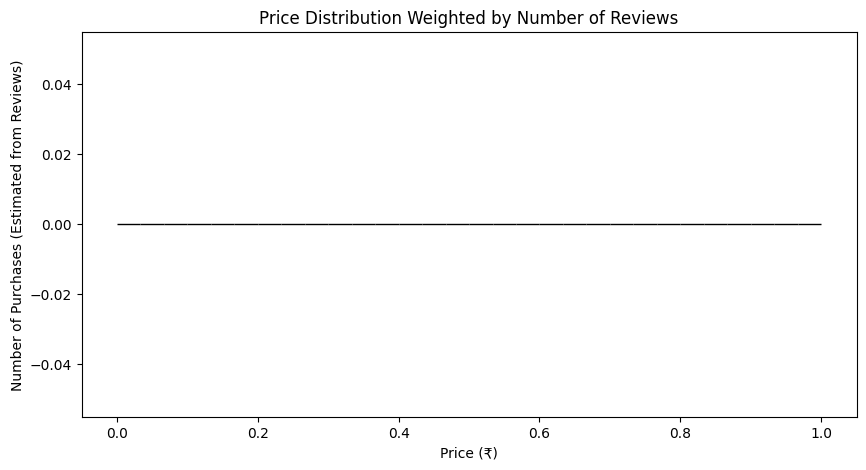

In [74]:
# Drop rows where either price or review_count is NaN
df_filtered = df.dropna(subset=['price_cleaned', 'review_count'])

plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_filtered,
    x='price_cleaned',
    weights='review_count',
    bins=30,
    kde=False,
    color='orange'
)
plt.title("Price Distribution Weighted by Number of Reviews")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Purchases (Estimated from Reviews)")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sasiabburi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/yg/8z4bh1bx7t116prys1q7k3fc0000gn/T/ipykernel_53440/1180683168.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[1] for w in common_words], y=[w[0] for w in common_words], palette="Blues_d")


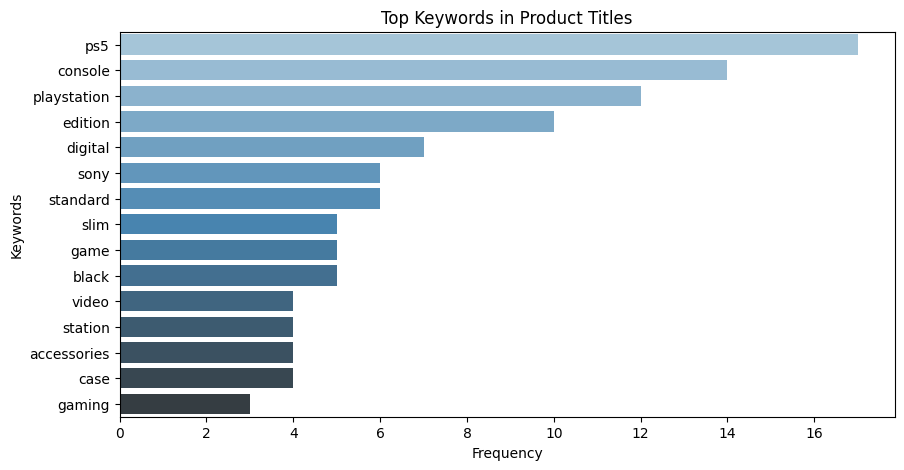

In [56]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize titles
words = " ".join(df['title'].dropna()).lower().translate(str.maketrans('', '', string.punctuation)).split()
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

word_freq = Counter(filtered_words)
common_words = word_freq.most_common(15)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=[w[1] for w in common_words], y=[w[0] for w in common_words], palette="Blues_d")
plt.title("Top Keywords in Product Titles")
plt.xlabel("Frequency")
plt.ylabel("Keywords")
plt.show()

In [58]:
# Null summary
print(df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

title             0
price            21
rating            0
reviews           0
availability      1
price_cleaned    21
dtype: int64
Duplicates: 0


In [64]:
# Convert review strings like "1,234 ratings" to numeric
df['review_count'] = df['reviews'].str.replace(",", "").str.extract(r'(\d+)')
df['review_count'] = pd.to_numeric(df['review_count'], errors='coerce')

# Now check if it worked
print(df[['reviews', 'review_count']].head(10))
print("Non-null review_count:", df['review_count'].notnull().sum())

         reviews  review_count
0    409 ratings           409
1    387 ratings           387
2     67 ratings            67
3  1,110 ratings          1110
4    552 ratings           552
5    883 ratings           883
6    364 ratings           364
7     93 ratings            93
8    126 ratings           126
9    601 ratings           601
Non-null review_count: 21


In [66]:
# Extract numeric part from rating strings (e.g., "4.3 out of 5 stars" → 4.3)
df['rating_cleaned'] = df['rating'].str.extract(r'(\d+\.?\d*)')
df['rating_cleaned'] = pd.to_numeric(df['rating_cleaned'], errors='coerce')

# Check the result
print(df[['rating', 'rating_cleaned']].head(10))
print("Non-null rating_cleaned:", df['rating_cleaned'].notnull().sum())

               rating  rating_cleaned
0  4.5 out of 5 stars             4.5
1  4.6 out of 5 stars             4.6
2  4.4 out of 5 stars             4.4
3  4.5 out of 5 stars             4.5
4  4.6 out of 5 stars             4.6
5  4.7 out of 5 stars             4.7
6  4.3 out of 5 stars             4.3
7  4.2 out of 5 stars             4.2
8  4.3 out of 5 stars             4.3
9  4.1 out of 5 stars             4.1
Non-null rating_cleaned: 21


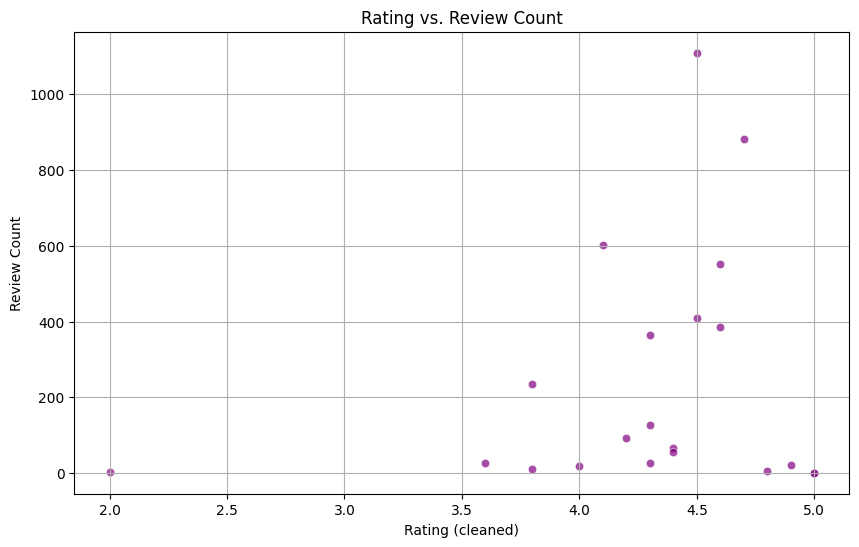

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Filter out rows with missing or zero values
df_plot = df[(df['rating_cleaned'].notnull()) & (df['review_count'].notnull())]
df_plot = df_plot[df_plot['review_count'] > 0]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_cleaned', y='review_count', data=df_plot, alpha=0.7, color='purple')

plt.title("Rating vs. Review Count")
plt.xlabel("Rating (cleaned)")
plt.ylabel("Review Count")
plt.grid(True)
plt.show()

In [82]:
# Null summary
print(df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

title               0
price              21
rating              0
reviews             0
availability        1
price_cleaned      21
rating_cleaned      0
reviews_cleaned    21
review_count        0
dtype: int64
Duplicates: 0


In [86]:
print(df_filtered['review_count'].describe())
print("Min review count:", df_filtered['review_count'].min())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: review_count, dtype: float64
Min review count: nan
